#  AI CA4 Dicision Tree and Random Forest 

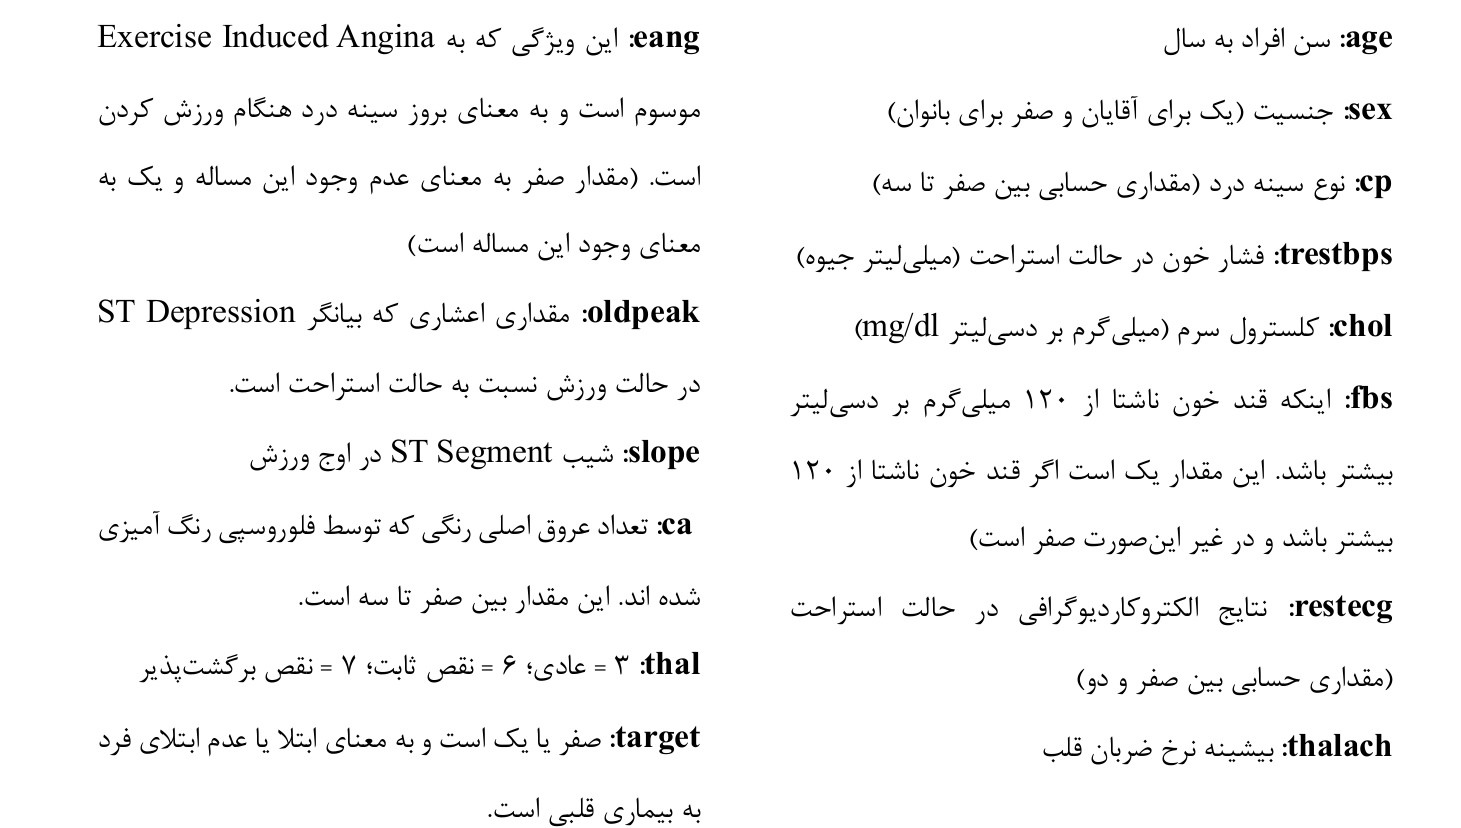


 Above you can see all features which we will work with to get to the model in which we can predict the target value according to features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline


Use pandas to read data.csv as a dataframe called data

In [2]:
data = pd.read_csv('hw.csv')
columns = data.columns
values = data.values



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
ID           14 non-null int64
presure      14 non-null int64
colostrol    14 non-null int64
sigar        14 non-null int64
vazn         14 non-null int64
target       14 non-null int64
dtypes: int64(6)
memory usage: 800.0 bytes


In [4]:
data.describe()

,ID,presure,colostrol,sigar,vazn,target
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,7.5000,0.571429,0.928571,0.500000,1.000000,0.642857
std,4.1833,0.513553,0.828742,0.518875,0.784465,0.497245
min,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.2500,0.000000,0.000000,0.000000,0.250000,0.000000
50%,7.5000,1.000000,1.000000,0.500000,1.000000,1.000000
75%,10.7500,1.000000,1.750000,1.000000,1.750000,1.000000
max,14.0000,1.000000,2.000000,1.000000,2.000000,1.000000


In [5]:
data.head()

,ID,presure,colostrol,sigar,vazn,target
0,1,1,0,0,1,1
1,2,0,0,1,0,0
2,3,0,2,0,1,1
3,4,0,1,1,1,1
4,5,1,2,1,2,1


Train Test Split and Training a Decision Tree Model. we split 20% of data for test and 80% of it for train.At the end we use this test data for calculating precision for random forest.

# Decision Tree

In [6]:
def make_decision_tree(data , size , state):
    X = data.drop('target',axis=1)
    y = data['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state = state)
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train,y_train)
    return dtree , X_test , X_train , y_train , y_test

In [7]:
dtree , X_test , X_train , y_train , y_test = make_decision_tree(data ,0.2 , 101)

According to decision tree we predict target in datas in X_test and store it in predictions.


In [8]:
predictions = dtree.predict(X_test)


In [9]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.33      0.50         3

avg / total       1.00      0.33      0.50         3



/usr/lib/python3/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Random Forest
# part 2

In this part we get the X_train in the previos part and devide it to 5 subsets of 150 data entries randomly with replacement.actually these subsets is our train data for making 5 trees.


after creating five decision tree with five different subsets we give test data to them and with the help of voter we predict the result of each enty. predict result will be maximum value of each trees.then we calculate precision. data test is 20% of data which we split it at first.

In [10]:
def bagging(X_train , y_train,  X_test , y_test):
    data_train = pd.concat([X_train , y_train] , axis = 1)
    
    data1 = data_train.sample(n = 151 , replace =True , random_state = 1)
    data2 = data_train.sample(n = 151 , replace = True ,random_state = 2)
    data3 = data_train.sample(n = 151 , replace = True ,random_state = 3)
    data4 = data_train.sample(n = 151 , replace = True ,random_state = 4)
    data5 = data_train.sample(n = 151 , replace = True ,random_state = 5)

    dtree1 , X_test1 , X_train1 , y_train1 , y_test1 =  make_decision_tree(data1 , 1 , 1)
    dtree2 , X_test2 , X_train2 , y_train2 , y_test2 =  make_decision_tree(data2 ,1 , 2)
    dtree3 , X_test3 , X_train3 , y_train3 , y_test3 =  make_decision_tree(data3 , 1 , 3)
    dtree4 , X_test4 , X_train4 , y_train4 , y_test4 =  make_decision_tree(data4 , 1 , 4)
    dtree5 , X_test1 , X_train1 , y_train1 , y_test1 =  make_decision_tree(data1 , 1 , 5)
    

    predict1 = dtree1.predict(X_test)
    predict2 = dtree2.predict(X_test)
    predict3 = dtree3.predict(X_test)
    predict4 = dtree4.predict(X_test)
    predict5 = dtree5.predict(X_test)

    y_predict_random_forest = []
   
    for i in range(len(y_test)):
        num = [0 , 0]
        num [predict1[i]]+=1
        num [predict2[i]]+=1
        num [predict3[i]]+=1
        num [predict4[i]]+=1
        num [predict5[i]]+=1
        
        if num[0] > num[1]:
            y_predict_random_forest.append(0)
        else:
            y_predict_random_forest.append(1)
        
    print(classification_report(y_test,y_predict_random_forest))



bagging(X_train, y_train, X_test , y_test)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.33      0.50         3

avg / total       1.00      0.33      0.50         3



# part 3

In this part at fisrt for each columns or better to say each feature of our data we delete it from data and again do the same as we have done in part 2. 


In [11]:
for feature in columns:
    if feature!='target':
        print(feature + " is deleted\n")
        data_new = data.drop([feature] , axis = 1)
        X = data_new.drop('target',axis=1)
        y = data_new['target']
        X_train_new , X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=.2, random_state=101)
        bagging(X_train_new ,y_train_new ,  X_test_new , y_test_new)
        print("\n\n")
        
    
    
    
    

    

ID is deleted

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.67      0.80         3

avg / total       1.00      0.67      0.80         3




presure is deleted

             precision    recall  f1-score   support

          1       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00         3




colostrol is deleted

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00         3

avg / total       0.00      0.00      0.00         3




sigar is deleted

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.33      0.50         3

avg / total       1.00      0.33      0.50         3




vazn is deleted

             precision    recall  f1-score   support

          0       0.00      0.00   

/usr/lib/python3/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# part 4 and 5


in this part we impliment random forest by choosing randomly 5 attributes and then as same as the previos part we calculate precision of model.

In [12]:
def random_forest(data):
    y = data['target']
    df = data.drop('target',axis=1)
    X = df.sample(5 , axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=101)
    bagging(X_train ,y_train, X_test , y_test)
   



In [13]:
random_forest(data)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.33      0.50         3

avg / total       1.00      0.33      0.50         3



# Extra

In [14]:
from IPython.display import display , Image
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from subprocess import call
from numpy.core.umath_tests import inner1d
import pydotplus 
# % matplotlib inline



/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [21]:
iris = load_iris()
feature_names = columns[:5]
target_names = 'target'


In [22]:
feature_names

Index(['ID', 'presure', 'colostrol', 'sigar', 'vazn'], dtype='object')

In [23]:
target_names

'target'

In [24]:
model = RandomForestClassifier(n_estimators = 10)
model.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
estimator = model.estimators_[5]

In [26]:
export_graphviz(estimator , out_file = 'tree.dot' ,
                feature_names = feature_names,
                class_names = target_names ,
                rounded = True , proportion = False ,
                precision = 2 , filled = True)

In [27]:
call(['dot' , '-Tpng' , 'tree.dot' , '-o' , 'tree.png' , '-Gdpi=600'] )

0

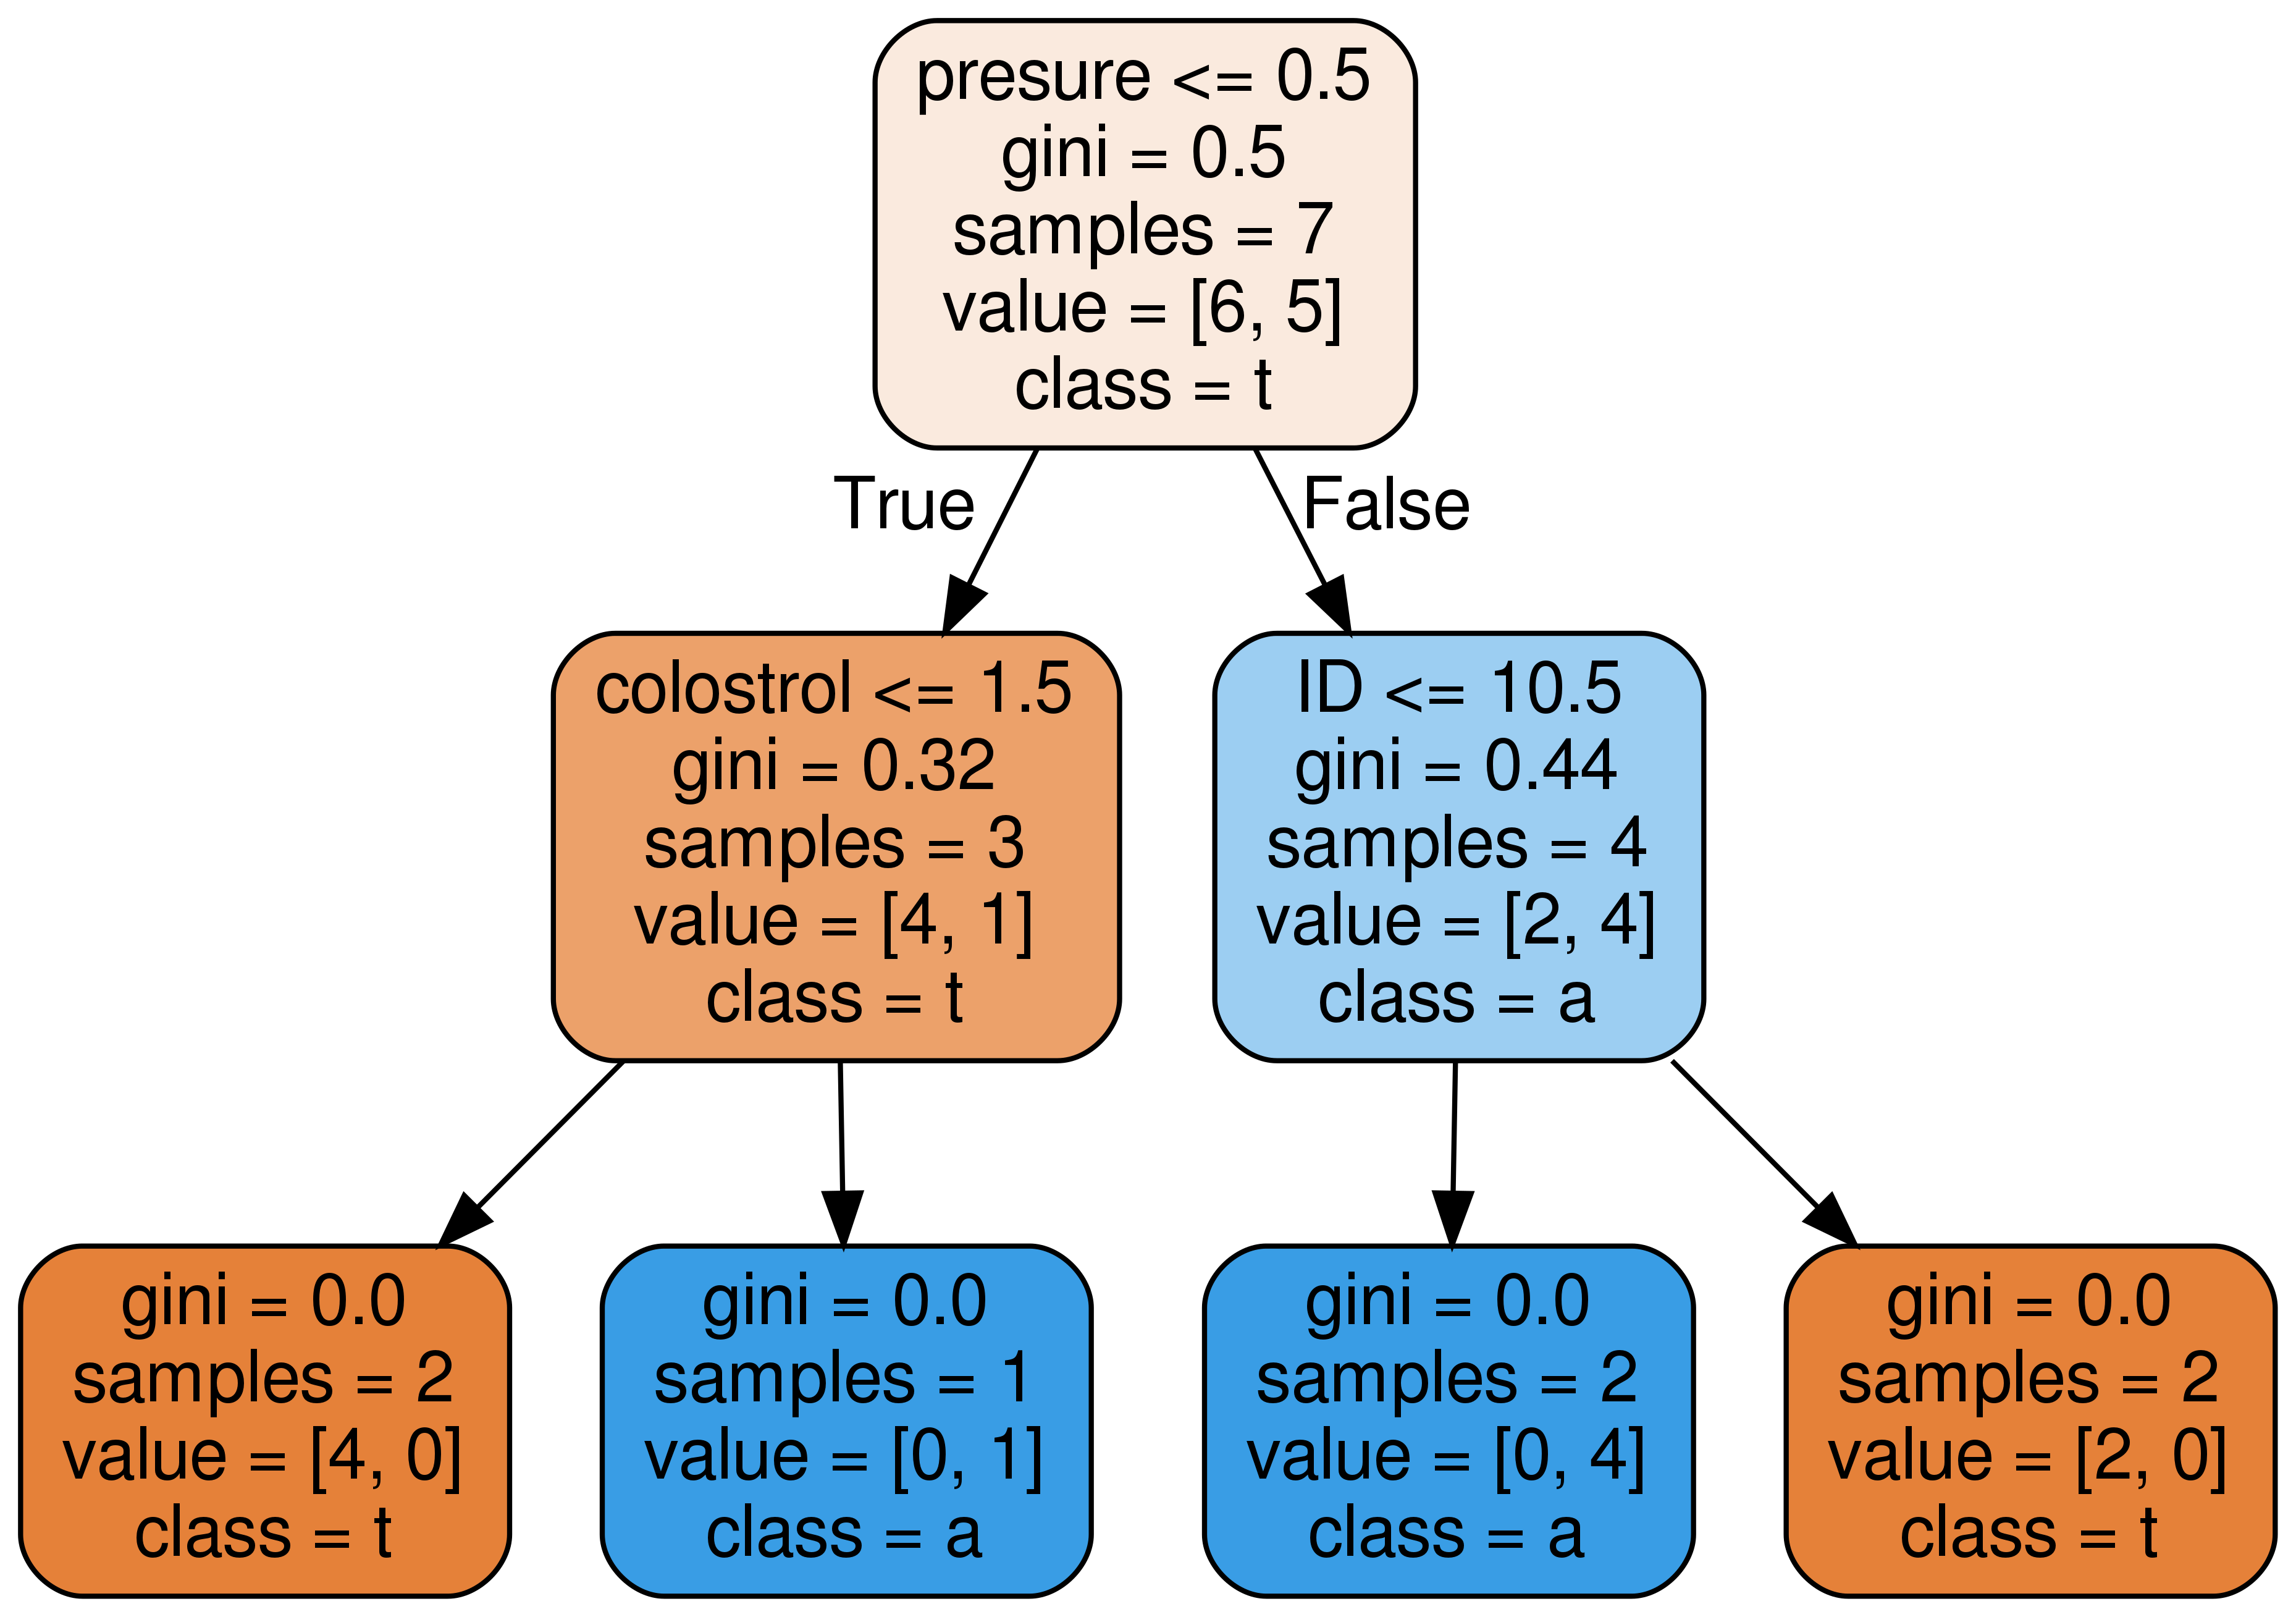

In [28]:
Image(filename = 'tree.png')

# Qestions 

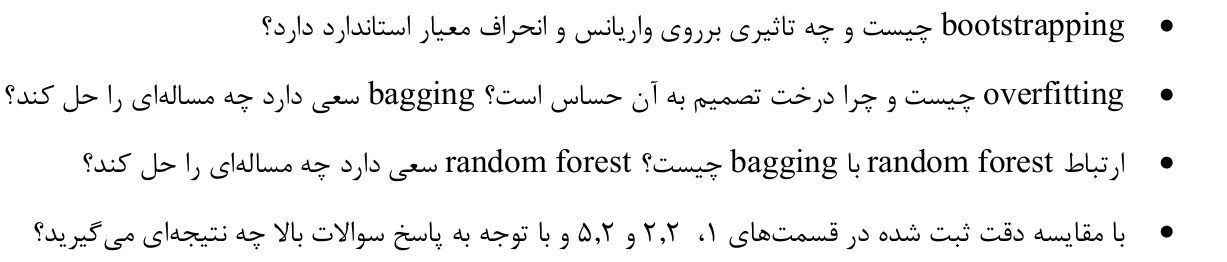 

1) Variance :
<br>In machine learning lingo, the difference in fits between data sets is called Variance.
<br>We want to achive the low variance and low bias state.
<br>This bootstrapping procedure leads to better model performance because it decreases the variance of the model, without increasing the bias. This means that while the predictions of a single tree are highly sensitive to noise in its training set, the average of many trees is not, as long as the trees are not correlated. Simply training many trees on a single training set would give strongly correlated trees (or even the same tree many times, if the training algorithm is deterministic); bootstrap sampling is a way of de-correlating the trees by showing them different training sets.

2) Overfitting :
<br>Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize. <br>Low Variance ~ Avoiding Overfitting
<br>There are about Three ways to avoid overfitting : Regularization, Boosting and Bagging.
<br>Bagging causes low variability by reducing the chance of "just remembering the exact given data set" and make the model more generalize.

3) Random Forrest and Bagging :
By choosing random samples of training data and random features, the Random Forrest is able to generate many trees that by using bagging method we are able to get low variance result that reduces the chance of getting overfitted result.
<br>In machine learning the random subspace method, also called attribute bagging or feature bagging, is an ensemble learning method that attempts to reduce the correlation between estimators in an ensemble by training them on random samples of features instead of the entire feature set.
<br>The reason for doing this is the correlation of the trees in an ordinary bootstrap sample: if one or a few features are very strong predictors for the response variable (target output), these features will be selected in many of the B trees, causing them to become correlated.